## First Task: Cosine Distance Among Political Parties

Import necessary tools.

In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import matplotlib.cm as cmap


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Read 300.000 rows of the given file.

In [2]:
%%time
data = pd.read_csv('../out_files/tell_all_corrected.csv')

CPU times: user 3.79 s, sys: 228 ms, total: 4.02 s
Wall time: 4.02 s


Get only the columns we need, that is "speech" and "political_party".

In [3]:
data = data[['speech', 'political_party']]
data.head(3)

speech  \
0   Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να σ...   
1   Παρακαλείται ο κύριος Γραμματέας να συνοδεύσε...   
2   Κύριοι συνάδελφοι, παρακαλώ τη Βουλή να εξουσ...   

                  political_party  
0  πανελληνιο σοσιαλιστικο κινημα  
1  πανελληνιο σοσιαλιστικο κινημα  
2  πανελληνιο σοσιαλιστικο κινημα

Group speeches by political party.

In [4]:
grouped_data = data.groupby(['political_party'])['speech'].apply(''.join).reset_index()
grouped_data.head(3)

political_party  \
0  ανεξαρτητοι (εκτος κομματος)   
1                 αντιπολιτευση   
2                         βουλη   

                                              speech  
0   Κύριε Πρόεδρε, κυρίες και κύριοι συνάδελφοι, ...  
1  Δεν σας ακούμε. Κατά πλειοψηφία. Κατά πλειοψηφ...  
2   Μάλιστα, μάλιστα. Μάλιστα, μάλιστα. Μάλιστα, ...

Transform speeches with TfidfVectorizer and compute cosine similarity.

X is the tf-idf matrix of the documents. Its shape is (number of documents/speeches, number of unique tokens).
For each document, the first tuple represents: (document_id, token_id) and the value following the tuple represents the tf-idf score of a given token in a given document. The tuples that are not there have a tf-idf score of 0.

In the TfidfVectorizer() you can try out different min_df, max_df parameters (either number of frequency) and see how the X.shape and similarities change

In [5]:
grouped_data.speech = grouped_data.speech.str.translate(
                 str.maketrans('άέόώήίϊΐύϋΰ', 'αεοωηιιιυυυ')
               )

In [6]:
vec = TfidfVectorizer(min_df=0.1, max_df=0.9)
X = vec.fit_transform(grouped_data['speech'])
similarities = cosine_similarity(X)

In [7]:
X.shape

(12, 107831)

With the function below you can see the words/tokens used for the tfidf matrix. This will help in the next steps with the possible preprocessing of the speeches for the best computation of cosine similarity.

In [8]:
vec.get_feature_names()

['00',
 '000',
 '0000',
 '0001',
 '0002',
 '0004',
 '0005',
 '0006α',
 '0007',
 '0009',
 '000σελιδα',
 '000τα',
 '001',
 '0010',
 '0011',
 '0012',
 '0013',
 '0014',
 '0015',
 '0016',
 '0017',
 '002',
 '0020',
 '0022',
 '0023',
 '0024',
 '0025',
 '0026',
 '0027',
 '0028',
 '0029',
 '003',
 '0030',
 '0031',
 '0032',
 '0033',
 '0034',
 '0035',
 '0036',
 '0037',
 '0038',
 '0039',
 '0041',
 '0042',
 '0044',
 '0045',
 '0046',
 '0047',
 '0048',
 '0049',
 '0050',
 '0051',
 '0052',
 '0053',
 '0054',
 '006',
 '0060',
 '0062',
 '0063',
 '0065',
 '007',
 '0070',
 '0071',
 '0072',
 '0073',
 '0075',
 '0076',
 '0077',
 '0078',
 '0079',
 '008',
 '0080',
 '0081',
 '0082',
 '0083',
 '0084',
 '0085',
 '0086',
 '0087',
 '0088',
 '0089',
 '009',
 '0090',
 '0091',
 '0092',
 '0093',
 '0094',
 '0095',
 '0096',
 '0097',
 '0098',
 '0099',
 '00μ',
 '00μμ',
 '00πμ',
 '01',
 '010',
 '0100',
 '0101',
 '0102',
 '0106',
 '0108',
 '011',
 '0110',
 '0111',
 '0112',
 '0113',
 '0115',
 '0118',
 '012',
 '0122',
 '0123',
 

In [9]:
print(len(similarities))
print(similarities.shape)

12
(12, 12)


Visualize the results with a heatmap. The matrix shown is symmetric.

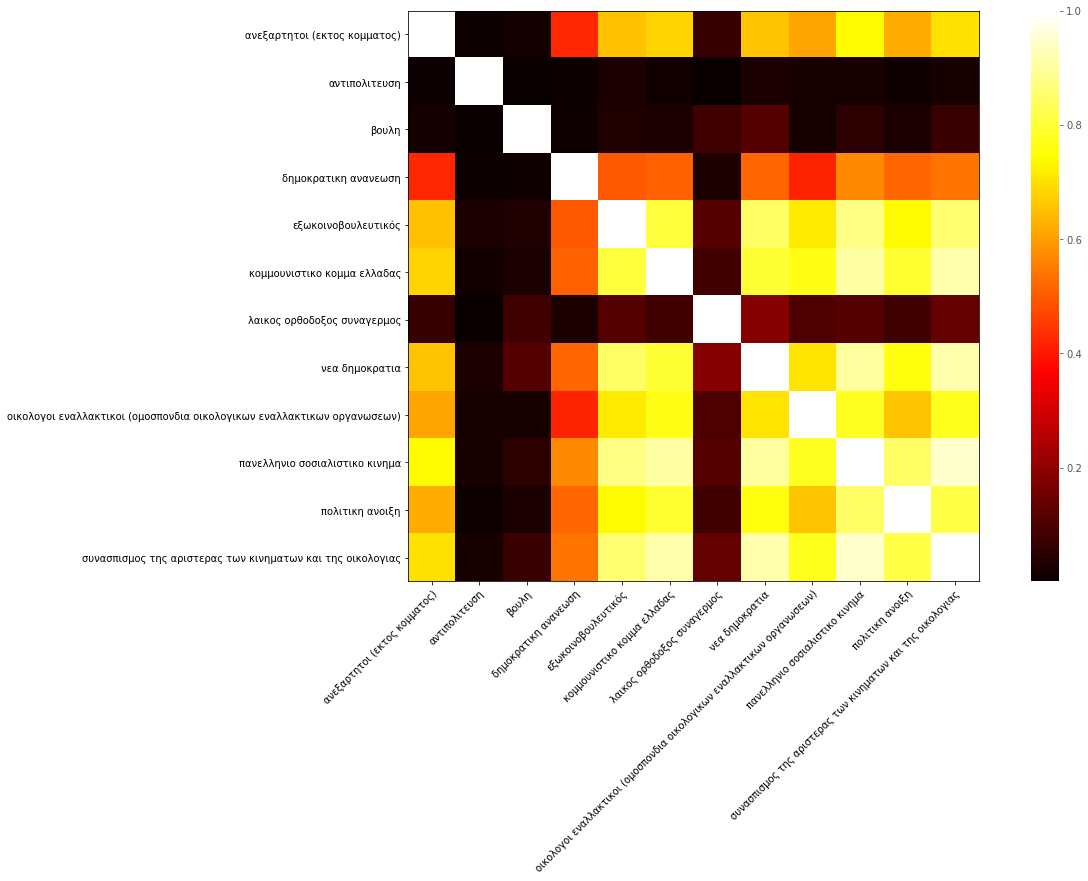

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plt.style.use('ggplot')
plt.imshow(similarities, cmap=cmap.hot)
plt.colorbar()

# We want to show all ticks...
ax.set_xticks(np.arange(len(similarities)))
ax.set_yticks(np.arange(len(similarities)))
# ... and label them with the respective list entries
ax.set_xticklabels(grouped_data.political_party)
ax.set_yticklabels(grouped_data.political_party)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.savefig('../out_files/fig1.png', dpi=100, bbox_inches='tight')
plt.show()

- We can conclude that there are some parties and the parliament that possibly have great differences in their speeches compared to the other parties' speeches. These parties are "Αντιπολίτευση", "Λαϊκός Ορθόδοξος Συναργεμός" and "Δημοκρατική Ανανέωση".
- All the other parties seem to have more similar speeches.

In [11]:
vec = TfidfVectorizer()
X = vec.fit_transform(grouped_data['speech'])
similarities = cosine_similarity(X)

Without any given parameters to TfidfVectorizer the scores are closer to 1, that is the different parties seem to have more similar speeches.

In [12]:
vec.get_feature_names()

['00',
 '000',
 '0000',
 '0001',
 '000102',
 '00011',
 '000112',
 '00012',
 '000123',
 '00013',
 '000133',
 '000144',
 '000145',
 '00015',
 '000155',
 '00016',
 '000167',
 '00017',
 '000178',
 '000189',
 '00019',
 '0001911',
 '0002',
 '00020',
 '0002013',
 '00021',
 '0002116',
 '00022',
 '00023',
 '00024',
 '00025',
 '000255',
 '00027',
 '000297',
 '0002γραφημα',
 '0002θεωρουμε',
 '0003',
 '000319',
 '0003επιλεξει',
 '0004',
 '0004γων',
 '0005',
 '0006',
 '000603',
 '000635',
 '0006α',
 '0006που',
 '0007',
 '000716',
 '0008',
 '00081',
 '000858',
 '0008μοκρατια',
 '0009',
 '00091',
 '000927',
 '0009α',
 '0009ορισμενες',
 '000mw',
 '000έτος',
 '000αυτα',
 '000διδακτικο',
 '000δραχμες',
 '000δραχμων',
 '000δρχ',
 '000επι',
 '000και',
 '000καταστηματαρχες',
 '000νται',
 '000προηγουμενηςμετ',
 '000πως',
 '000σελιδα',
 '000τα',
 '000υπερβαλλον',
 '001',
 '0010',
 '0010λογη',
 '0010μερη',
 '0010νομους',
 '0011',
 '0011δυο',
 '0012',
 '0012αναφερθω',
 '0012βητηση',
 '0013',
 '0013απο',
 '0014

In [13]:
X.shape

(12, 234990)

The tokenised words are more, as expected, because without parameters/limits more words are taken into consideration and have associated scores.

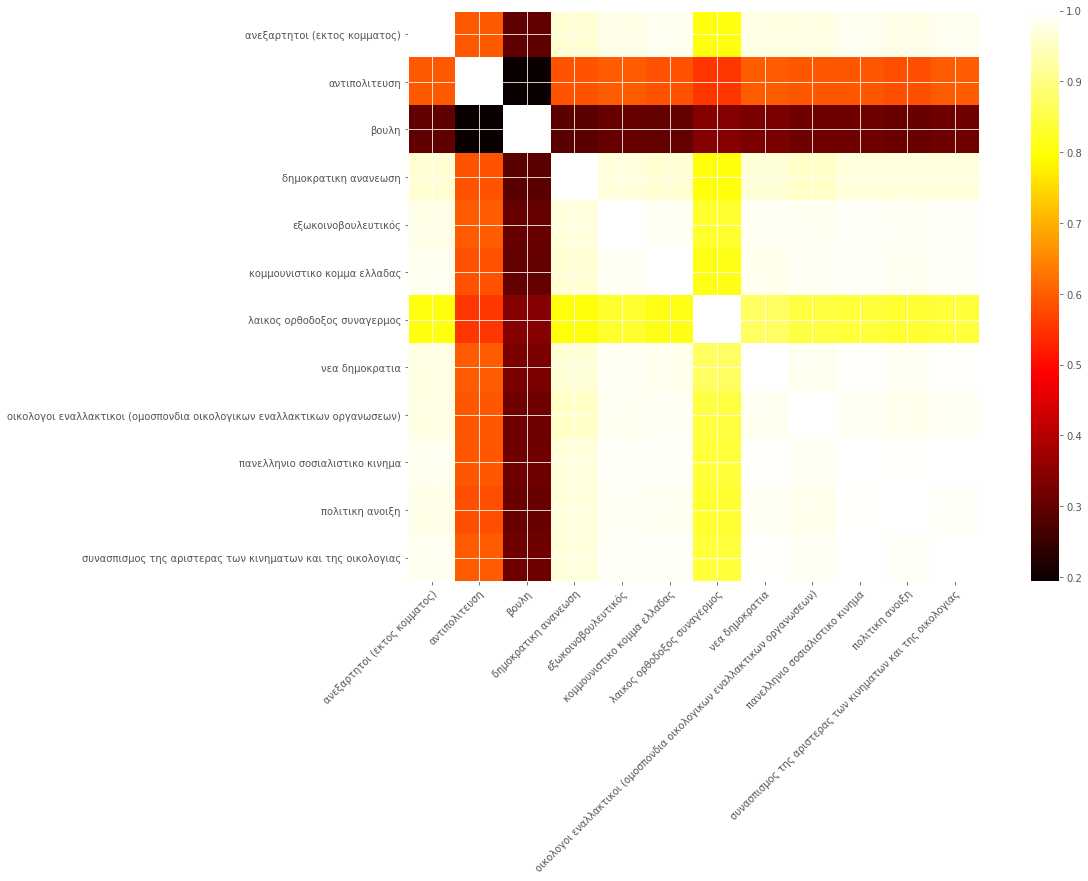

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plt.style.use('ggplot')
plt.imshow(similarities, cmap=cmap.hot)
plt.colorbar()

# We want to show all ticks...
ax.set_xticks(np.arange(len(similarities)))
ax.set_yticks(np.arange(len(similarities)))
# ... and label them with the respective list entries
ax.set_xticklabels(grouped_data.political_party)
ax.set_yticklabels(grouped_data.political_party)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.savefig('../out_files/fig2.png', bbox_inches='tight')
plt.show()

In [15]:
vec = TfidfVectorizer(min_df=0.25, max_df=0.75)
X = vec.fit_transform(grouped_data['speech'])
similarities = cosine_similarity(X)

In [16]:
vec.get_feature_names()

['00',
 '0000',
 '0007',
 '001',
 '0010',
 '0014',
 '0015',
 '0016',
 '0022',
 '0024',
 '0029',
 '0030',
 '0031',
 '0032',
 '0035',
 '0038',
 '0041',
 '0046',
 '0050',
 '0052',
 '0053',
 '0073',
 '0078',
 '0079',
 '008',
 '0083',
 '0086',
 '0090',
 '0091',
 '0096',
 '00μμ',
 '01',
 '010',
 '0100',
 '011',
 '0111',
 '0115',
 '0124',
 '0126',
 '0127',
 '013',
 '014',
 '0147',
 '0149',
 '015',
 '0151',
 '0153',
 '0158',
 '0175',
 '0176',
 '0177',
 '0178',
 '019',
 '0191',
 '0197',
 '0199',
 '02',
 '020',
 '0206',
 '021',
 '0211',
 '0219',
 '022',
 '024',
 '0247',
 '025',
 '026',
 '0265',
 '0266',
 '027',
 '0273',
 '0276',
 '028',
 '0289',
 '029',
 '0290',
 '0293',
 '03',
 '030',
 '032',
 '0356',
 '04',
 '040',
 '0430',
 '0431',
 '0468',
 '047',
 '048',
 '05',
 '050',
 '051',
 '052',
 '054',
 '0549',
 '056',
 '0561',
 '0573',
 '06',
 '060',
 '062',
 '064',
 '0643',
 '065',
 '069',
 '0699',
 '07',
 '072',
 '0725',
 '076',
 '077',
 '0777',
 '0797',
 '0799',
 '08',
 '080',
 '081',
 '082',
 '0

In [17]:
X.shape

(12, 66803)

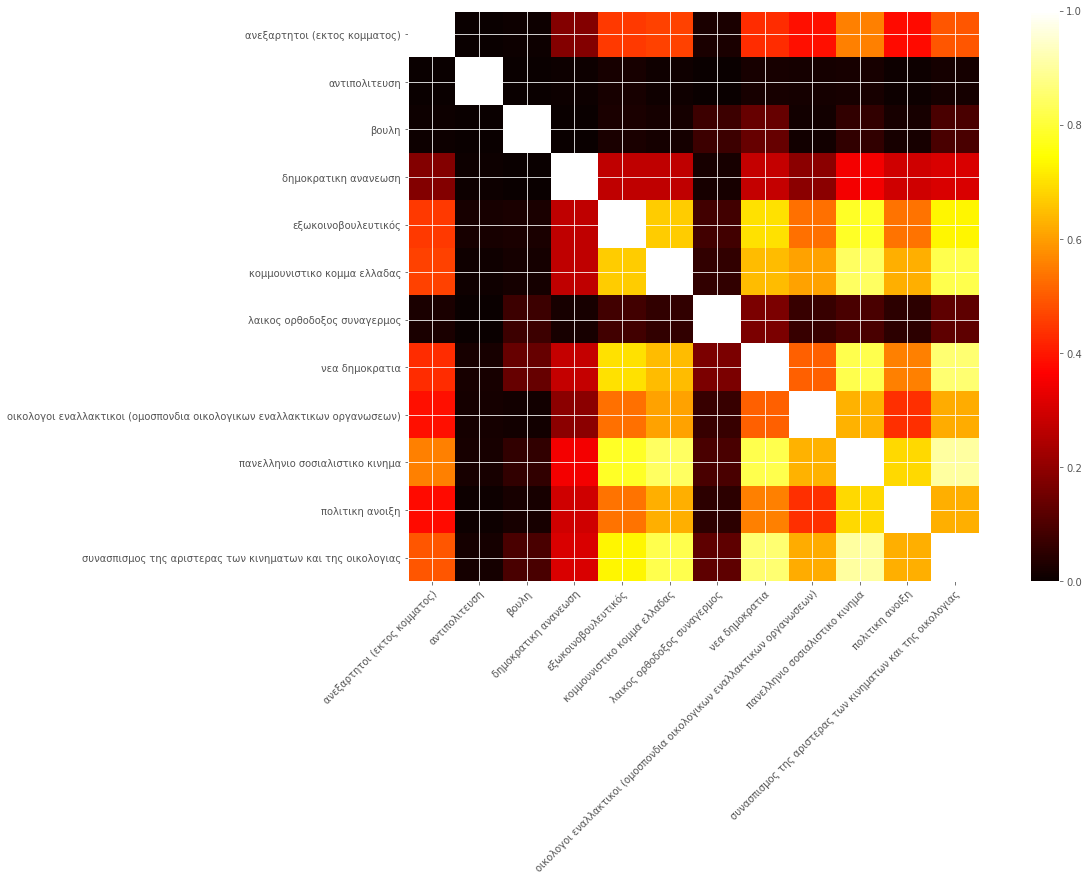

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plt.style.use('ggplot')
plt.imshow(similarities, cmap=cmap.hot)
plt.colorbar()

# We want to show all ticks...
ax.set_xticks(np.arange(len(similarities)))
ax.set_yticks(np.arange(len(similarities)))
# ... and label them with the respective list entries
ax.set_xticklabels(grouped_data.political_party)
ax.set_yticklabels(grouped_data.political_party)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.savefig('../out_files/fig3.png', bbox_inches='tight')
plt.show()

Setting the limits higher seems to make the differences among parties larger. Now independent members and "Οικολόγοι Εναλλακτικοί" seem to have differences, too.

In [19]:
doubt = data.groupby(['political_party']).count()
doubt.sort_values(['speech'])

speech
political_party                                           
αντιπολιτευση                                            9
λαικος ορθοδοξος συναγερμος                             36
δημοκρατικη ανανεωση                                   102
οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων ...     307
ανεξαρτητοι (εκτος κομματος)                           428
πολιτικη ανοιξη                                       1084
εξωκοινοβουλευτικός                                   3505
κομμουνιστικο κομμα ελλαδας                           5457
βουλη                                                 6543
συνασπισμος της αριστερας των κινηματων και της...   24522
πανελληνιο σοσιαλιστικο κινημα                       70785
νεα δημοκρατια                                       87222

- The conclusions we make by seeing the results above may be misleading. Parties' speeches with greater differences seem to depend on the fact that the speeches available are less. On the other hand, "Νέα Δημοκρατία", "Πανελλήνιο Σοσιαλιστικό Κίνημα" and "Συνασπισμος της Αριστερας των Κινηματων και της Οικολογιας" with the most speeches seem to be generally similar to other parties.
- However, "Βουλή", for example, has enough speeches and great differences, too.

## Cosine Distance with preprocessing

#### Digits removal

In [20]:
#select data with accents (we need accents for lemmatization)
data_preprocess = data.groupby(['political_party'])['speech'].apply(''.join).reset_index()

Now we remove all numbers from the dataframe and we'll see the results

In [21]:
from string import digits

# Note: removed mistaken command grouped_data['speech'] = data['speech'].replace(r'\b[0-9][0-9.,-]*\b', '', regex=True) 

# Remove numbers from speeches as well as within strings.
remove_digits = str.maketrans('', '', digits)
data_preprocess['speech'] = data_preprocess['speech'].apply(lambda x: x.translate(remove_digits))

In [22]:
%%time
vec = TfidfVectorizer()
X = vec.fit_transform(data_preprocess['speech'])
similarities = cosine_similarity(X)

CPU times: user 25.8 s, sys: 440 ms, total: 26.3 s
Wall time: 26.2 s


In [23]:
vec.get_feature_names()

['aa',
 'ab',
 'abairrahim',
 'abandonner',
 'abandonnγs',
 'abb',
 'abbas',
 'abc',
 'abdal',
 'abdel',
 'abee',
 'abela',
 'ability',
 'ablation',
 'able',
 'abn',
 'about',
 'aboutir',
 'aboutissant',
 'above',
 'abovementioned',
 'abreuvement',
 'abreuvoirs',
 'abri',
 'abridging',
 'abritant',
 'abriter',
 'absence',
 'absent',
 'absentia',
 'absoluitur',
 'absolute',
 'absorbantes',
 'absorption',
 'abstracta',
 'abstraction',
 'abstracto',
 'absurdum',
 'abuse',
 'abusus',
 'academie',
 'accede',
 'acceded',
 'accedes',
 'acceding',
 'accep',
 'accept',
 'accepta',
 'acceptable',
 'acceptance',
 'acceptances',
 'acceptant',
 'acceptation',
 'accepte',
 'accepted',
 'accepter',
 'acceptγ',
 'acceptγe',
 'acceptγes',
 'acceptγs',
 'acces',
 'access',
 'accessible',
 'accessibles',
 'accession',
 'accessions',
 'accessoires',
 'accessories',
 'acci',
 'accident',
 'accidents',
 'acciona',
 'acclimatation',
 'acclimatγs',
 'accommodated',
 'accommodation',
 'accommodationaccommodati

In [24]:
X.shape

(12, 220433)

Without any parameters in TfidfVectorizer, both feature names seem improved and tokens are critically reduced.

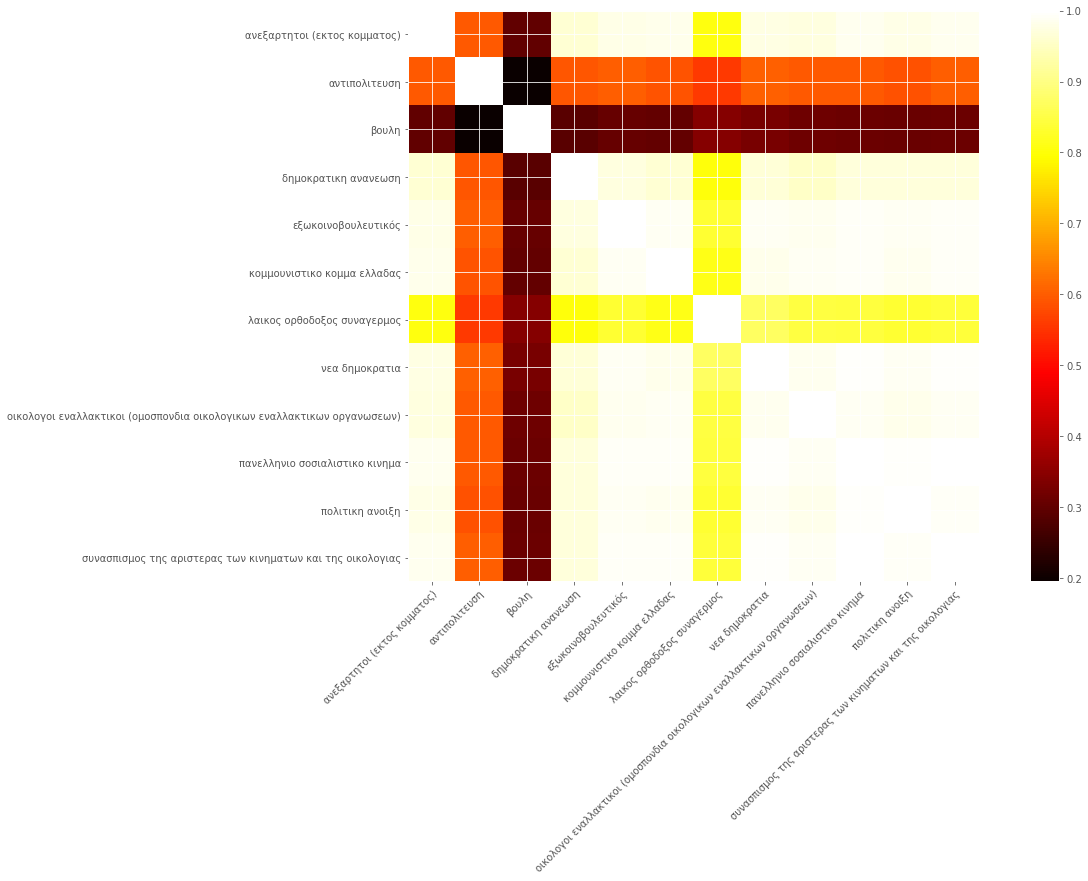

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plt.style.use('ggplot')
plt.imshow(similarities, cmap=cmap.hot)
plt.colorbar()

# We want to show all ticks...
ax.set_xticks(np.arange(len(similarities)))
ax.set_yticks(np.arange(len(similarities)))
# ... and label them with the respective list entries
ax.set_xticklabels(data_preprocess.political_party)
ax.set_yticklabels(data_preprocess.political_party)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.savefig('../out_files/fig4.png', bbox_inches='tight')
plt.show()

All parties seem to be different concerning their speeches except "Πανελλήνιο Σοσιαλιστικό Κίνημα" - "Δημοκρατική Ανανέωση" and "Πολιτική Άνοιξη" - "Δημοκρατικό Κοινωνικό Κίνημα".

We try to add some parameters in TfidfVectorizer, too.

In [26]:
data_preprocess['speech'] = data_preprocess.speech.str.translate(
                 str.maketrans('άέόώήίϊΐύϋΰ', 'αεοωηιιιυυυ'))

In [27]:
%%time
vec = TfidfVectorizer(min_df=0.1, max_df=0.9) #moved accents stripping above because vectorizer was too slow
X = vec.fit_transform(data_preprocess['speech'])
similarities = cosine_similarity(X)

CPU times: user 25.4 s, sys: 424 ms, total: 25.8 s
Wall time: 25.8 s


In [28]:
X.shape

(12, 103192)

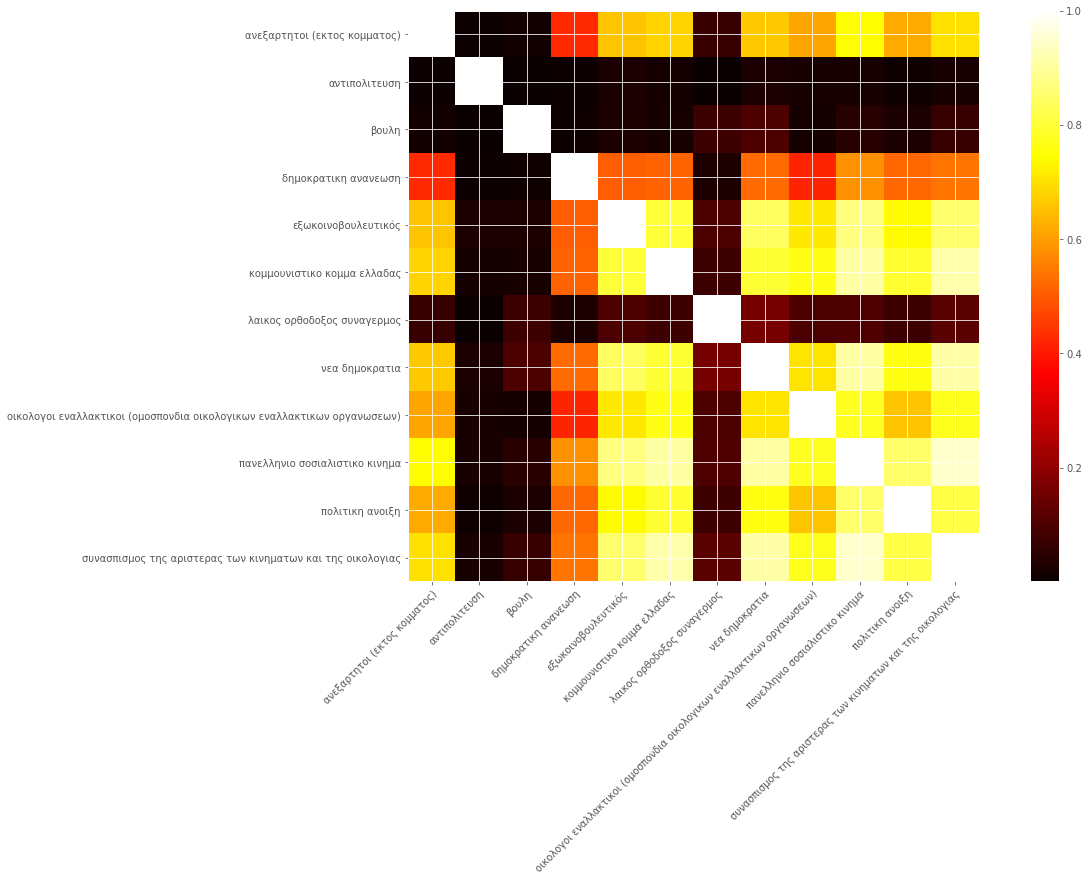

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plt.style.use('ggplot')
plt.imshow(similarities, cmap=cmap.hot)
plt.colorbar()

# We want to show all ticks...
ax.set_xticks(np.arange(len(similarities)))
ax.set_yticks(np.arange(len(similarities)))
# ... and label them with the respective list entries
ax.set_xticklabels(data_preprocess.political_party)
ax.set_yticklabels(data_preprocess.political_party)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.savefig('../out_files/fig5.png', bbox_inches='tight')
plt.show()

 Edited: When less tokens are identified, the differences seem to be larger.

#### Stopwords removal (stemming)

In [30]:
# (dina) Simple and more common way to process the txt file of stopwords

with open ('../out_files/greek_stopwords_cschwem2er_with_accents.txt', 'r', encoding='utf-8') as f:
    stopwords = f.read().upper().split(',')#.translate(str.maketrans('άέόώήίϊΐύϋΰ', 'αεοωηιιιυυυ'))

In [31]:
import string

#removed punctuation here with this fast way because nltk.tokenize is was too sloww
grouped_data_stopwords_removed = data_preprocess.copy()
grouped_data_stopwords_removed['speech'] = grouped_data_stopwords_removed['speech'].str.translate(str.maketrans('', '', string.punctuation))

In [32]:
# we uppercase the speeches before stemming
#grouped_data_stopwords_removed = data_preprocess.copy() (kaiti)
# (dina) moved accent removal further down. we should keep accents before stopword removal
# because we should not remove δίκη while the stopword is δική (without accents they are the same)
# grouped_data_stemmed['speech'] = grouped_data.speech.str.translate(
#                  str.maketrans('άέόώήίϊΐύϋΰ', 'αεοωηιιιυυυ')
#                )
grouped_data_stopwords_removed['speech'] = grouped_data_stopwords_removed['speech'].str.upper()
grouped_data_stopwords_removed['speech']

0      ΚΥΡΙΕ ΠΡΟΕΔΡΕ ΚΥΡΙΕΣ ΚΑΙ ΚΥΡΙΟΙ ΣΥΝΑΔΕΛΦΟΙ ΘΕ...
1     ΔΕΝ ΣΑΣ ΑΚΟΥΜΕ ΚΑΤΑ ΠΛΕΙΟΨΗΦΙΑ ΚΑΤΑ ΠΛΕΙΟΨΗΦΙΑ...
2      ΜΑΛΙΣΤΑ ΜΑΛΙΣΤΑ ΜΑΛΙΣΤΑ ΜΑΛΙΣΤΑ ΜΑΛΙΣΤΑ ΜΑΛΙΣ...
3     ΑΥΤΟ ΤΟ ΟΠΟΙΟ ΕΙΝΑΙ ΣΗΜΑΝΤΙΚΟ ΑΞΙΟΤΙΜΕΣ ΚΥΡΙΕΣ...
4      ΚΥΡΙΕΣ ΚΑΙ ΚΥΡΙΟΙ ΒΟΥΛΕΥΤΕΣ ΣΤΗ ΣΥΖΗΤΗΣΗ ΓΙΑ ...
5      ΚΥΡΙΕ ΠΡΟΕΔΡΕ ΚΑΙ ΚΥΡΙΟΙ ΒΟΥΛΕΥΤΕΣ ΤΟ ΠΑΡΟΝ Ν...
6      Η ΒΟΥΛΗ ΕΓΚΡΙΝΕΙ ΚΥΡΙΟΙ ΣΥΝΑΔΕΛΦΟΙ ΕΙΣΕΡΧΟΜΑΣ...
7      ΚΥΡΙΕΣ ΚΑΙ ΚΥΡΙΟΙ ΣΥΝΑΔΕΛΦΟΙ ΑΝΑΛΑΜΒΑΝΟΝΤΑΣ Τ...
8      ΕΥΧΑΡΙΣΤΩ ΠΟΥ ΕΣΤΩ ΚΑΙ ΤΟΣΟ ΑΡΓΑ ΗΡΘΕ Η ΣΕΙΡΑ...
9      ΠΑΡΑΚΑΛΕΙΤΑΙ Ο ΓΡΑΜΜΑΤΕΑΣ Κ ΒΟΥΛΓΑΡΑΚΗΣ ΝΑ ΣΥ...
10     ΚΥΡΙΕ ΠΡΟΕΔΡΕ ΑΠΛΩΣ ΘΑ ΗΘΕΛΑ ΝΑ ΥΠΕΝΘΥΜΙΣΩ ΟΤ...
11     ΚΥΡΙΕ ΠΡΟΕΔΡΕ ΘΑ ΣΥΝΗΓΟΡΗΣΟΥΜΕ ΚΑΙ ΕΜΕΙΣ ΣΤΟ ...
Name: speech, dtype: object

In [33]:
# (dina) Έχει σχέση με το επόμενο cell
# Example to inspect difference between split() and nltk.word_tokenize
import nltk
from nltk.tokenize import word_tokenize

example = 'ΑΥΤΟ, ΣΗΜΑΝΤΙΚΟ, ΑΞΙΟΤΙΜΕΣ. ΚΥΡΙΕΣ ΑΞΙΟΤΙΜΟΙ '
print(example.split())
print(nltk.word_tokenize(example))

['ΑΥΤΟ,', 'ΣΗΜΑΝΤΙΚΟ,', 'ΑΞΙΟΤΙΜΕΣ.', 'ΚΥΡΙΕΣ', 'ΑΞΙΟΤΙΜΟΙ']
['ΑΥΤΟ', ',', 'ΣΗΜΑΝΤΙΚΟ', ',', 'ΑΞΙΟΤΙΜΕΣ', '.', 'ΚΥΡΙΕΣ', 'ΑΞΙΟΤΙΜΟΙ']


In [34]:
# %%time
# #check that stopwords are indeed removed

# # (dina) commented out the command with split()
# # grouped_data_stemmed['speech'] = grouped_data_stemmed['speech'].apply(
# #         lambda x: ' '.join([word for word in x.split() if word not in (stopwords_stemming)])
# #     )

# #(dina) Replaced split() with word_tokenize()
# grouped_data_stopwords_removed['speech'] = grouped_data_stopwords_removed['speech'].apply(
#         lambda x: ' '.join([word for word in word_tokenize(x) if word not in (stopwords)])
#     )
# grouped_data_stopwords_removed

CPU times: user 5min 49s, sys: 982 ms, total: 5min 49s
Wall time: 5min 49s


political_party  \
0                        ανεξαρτητοι (εκτος κομματος)   
1                                       αντιπολιτευση   
2                                               βουλη   
3                                δημοκρατικη ανανεωση   
4                                 εξωκοινοβουλευτικός   
5                         κομμουνιστικο κομμα ελλαδας   
6                         λαικος ορθοδοξος συναγερμος   
7                                      νεα δημοκρατια   
8   οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων...   
9                      πανελληνιο σοσιαλιστικο κινημα   
10                                    πολιτικη ανοιξη   
11  συνασπισμος της αριστερας των κινηματων και τη...   

                                               speech  
0   ΚΥΡΙΕ ΠΡΟΕΔΡΕ ΚΥΡΙΕΣ ΚΥΡΙΟΙ ΣΥΝΑΔΕΛΦΟΙ ΘΕΩΡΩ Ι...  
1   ΑΚΟΥΜΕ ΚΑΤΑ ΠΛΕΙΟΨΗΦΙΑ ΚΑΤΑ ΠΛΕΙΟΨΗΦΙΑ ΚΑΤΑ ΠΛ...  
2   ΜΑΛΙΣΤΑ ΜΑΛΙΣΤΑ ΜΑΛΙΣΤΑ ΜΑΛΙΣΤΑ ΜΑΛΙΣΤΑ ΜΑΛΙΣΤ...  
3   ΑΥΤΟ ΟΠΟΙΟ ΕΙΝΑΙ ΣΗΜΑΝΤΙΚΟ ΑΞΙΟΤΙΜΕΣ ΚΥΡΙΕΣ ΑΞ...  
4   ΚΥΡΙΕΣ ΚΥΡΙΟΙ ΒΟΥΛΕΥΤΕΣ ΣΥΖΗΤΗΣΗ ΠΡΟΓΡΑΜΜΑΤΙΚΕ...  
5   ΚΥΡΙΕ ΠΡΟΕΔΡΕ ΚΥΡΙΟΙ ΒΟΥΛΕΥΤΕΣ ΠΑΡΟΝ ΝΟΜΟΣΧΕΔΙ...  
6   ΒΟΥΛΗ ΕΓΚΡΙΝΕΙ ΚΥΡΙΟΙ ΣΥΝΑΔΕΛΦΟΙ ΕΙΣΕΡΧΟΜΑΣΤΕ ...  
7   ΚΥΡΙΕΣ ΚΥΡΙΟΙ ΣΥΝΑΔΕΛΦΟΙ ΑΝΑΛΑΜΒΑΝΟΝΤΑΣ ΠΡΟΕΔΡ...  
8   ΕΥΧΑΡΙΣΤΩ ΕΣΤΩ ΤΟΣΟ ΑΡΓΑ ΗΡΘΕ ΣΕΙΡΑ ΑΝΤΙΠΡΟΣΩΠ...  
9   ΠΑΡΑΚΑΛΕΙΤΑΙ ΓΡΑΜΜΑΤΕΑΣ Κ ΒΟΥΛΓΑΡΑΚΗΣ ΣΥΝΟΔΕΥΣ...  
10  ΚΥΡΙΕ ΠΡΟΕΔΡΕ ΑΠΛΩΣ ΗΘΕΛΑ ΥΠΕΝΘΥΜΙΣΩ ΟΤΙ ΠΡΕΠΕ...  
11  ΚΥΡΙΕ ΠΡΟΕΔΡΕ ΣΥΝΗΓΟΡΗΣΟΥΜΕ ΕΜΕΙΣ ΑΙΤΗΜΑ ΣΥΖΗΤ...

In [35]:
%%time
# (dina) Much faster implementation
remove = ('|'.join(stopwords)).upper()

grouped_data_stopwords_removed['speech'] = grouped_data_stopwords_removed['speech'].replace(r'\b('+remove+r')\b', '', regex=True) # (?i) for case insensitive search very slow
grouped_data_stopwords_removed

CPU times: user 5min 10s, sys: 859 ms, total: 5min 11s
Wall time: 5min 10s


political_party  \
0                        ανεξαρτητοι (εκτος κομματος)   
1                                       αντιπολιτευση   
2                                               βουλη   
3                                δημοκρατικη ανανεωση   
4                                 εξωκοινοβουλευτικός   
5                         κομμουνιστικο κομμα ελλαδας   
6                         λαικος ορθοδοξος συναγερμος   
7                                      νεα δημοκρατια   
8   οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων...   
9                      πανελληνιο σοσιαλιστικο κινημα   
10                                    πολιτικη ανοιξη   
11  συνασπισμος της αριστερας των κινηματων και τη...   

                                               speech  
0   ΚΥΡΙΕ ΠΡΟΕΔΡΕ ΚΥΡΙΕΣ ΚΥΡΙΟΙ ΣΥΝΑΔΕΛΦΟΙ ΘΕΩΡΩ Ι...  
1   ΑΚΟΥΜΕ ΚΑΤΑ ΠΛΕΙΟΨΗΦΙΑ ΚΑΤΑ ΠΛΕΙΟΨΗΦΙΑ ΚΑΤΑ ΠΛ...  
2   ΜΑΛΙΣΤΑ ΜΑΛΙΣΤΑ ΜΑΛΙΣΤΑ ΜΑΛΙΣΤΑ ΜΑΛΙΣΤΑ ΜΑΛΙΣΤ...  
3   ΑΥΤΟ ΟΠΟΙΟ ΕΙΝΑΙ ΣΗΜΑΝΤΙΚΟ ΑΞΙΟΤΙΜΕΣ ΚΥΡΙΕΣ ΑΞ...  
4   ΚΥΡΙΕΣ ΚΥΡΙΟΙ ΒΟΥΛΕΥΤΕΣ ΣΥΖΗΤΗΣΗ ΠΡΟΓΡΑΜΜΑΤΙΚΕ...  
5   ΚΥΡΙΕ ΠΡΟΕΔΡΕ ΚΥΡΙΟΙ ΒΟΥΛΕΥΤΕΣ ΠΑΡΟΝ ΝΟΜΟΣΧΕΔΙ...  
6   ΒΟΥΛΗ ΕΓΚΡΙΝΕΙ ΚΥΡΙΟΙ ΣΥΝΑΔΕΛΦΟΙ ΕΙΣΕΡΧΟΜΑΣΤΕ ...  
7   ΚΥΡΙΕΣ ΚΥΡΙΟΙ ΣΥΝΑΔΕΛΦΟΙ ΑΝΑΛΑΜΒΑΝΟΝΤΑΣ ΠΡΟΕΔΡ...  
8   ΕΥΧΑΡΙΣΤΩ ΕΣΤΩ ΤΟΣΟ ΑΡΓΑ ΗΡΘΕ ΣΕΙΡΑ ΑΝΤΙΠΡΟΣΩΠ...  
9   ΠΑΡΑΚΑΛΕΙΤΑΙ ΓΡΑΜΜΑΤΕΑΣ Κ ΒΟΥΛΓΑΡΑΚΗΣ ΣΥΝΟΔΕΥΣ...  
10  ΚΥΡΙΕ ΠΡΟΕΔΡΕ ΑΠΛΩΣ ΗΘΕΛΑ ΥΠΕΝΘΥΜΙΣΩ ΟΤΙ ΠΡΕΠΕ...  
11  ΚΥΡΙΕ ΠΡΟΕΔΡΕ ΣΥΝΗΓΟΡΗΣΟΥΜΕ ΕΜΕΙΣ ΑΙΤΗΜΑ ΣΥΖΗΤ...

(dina) Note: εν τω μεταξύ δοκίμασα και την παρακάτω εντολή, η οποία δίνει δυνατότητα να κρατήσεις το αρχικό κείμενο χωρίς αλλαγές σε lower/upper case και κάνει 3πλασιο χρονο. Φαίνεται το df.replace() είναι optimized και το case insensitive search είναι πολύ αργό.
 
regex = re.compile(r'\b('+remove+r')\b', flags=re.IGNORECASE) # με το ignorecase δεν χρειάζεται να κάνεις κάτι upper ή lower case.
grouped_data_stemmed['speech'] = grouped_data_stemmed['speech'].apply(lambda x: re.sub(regex, '', x))

#### Stemming

Note: Here make a copy of the grouped_data dataframe e.g. grouped_data_stemmed = grouped_data.copy(), so that you don't permanently stem the data and have to rerun all the previous steps to try lemmatization next.


In [36]:
from greek_stemmer import GreekStemmer

stemmer = GreekStemmer()

grouped_data_stemmed = grouped_data_stopwords_removed.copy()

# (dina) moved here accent removal for stemmer to work properly
grouped_data_stemmed['speech'] = grouped_data_stemmed['speech'].str.lower() # make it lower() for maketrans to match below
grouped_data_stemmed['speech'] = grouped_data_stemmed.speech.str.translate(
                 str.maketrans('άέόώήίϊΐύϋΰ', 'αεοωηιιιυυυ'))
grouped_data_stemmed['speech'] = grouped_data_stemmed['speech'].str.upper() #make it upper again for greek_stemmer to work


def stemming_tokenizer(str_input):
#     words = str_input.split() # (dina) replace split with tokenize for better tokenization
    words = nltk.word_tokenize(str_input)
    words = [stemmer.stem(word) for word in words] # (dina) better avoid assigning to a list itself while changing it
    stemmed_words = [stemmer.stem(word) for word in words] # dina) changed words to stemmed_words: avoid assigning to a list itsself while changing it
    print(stemmed_words[:10])
    return stemmed_words

In [37]:
%%time
vec = TfidfVectorizer(min_df=0.1, max_df=0.9, tokenizer=stemming_tokenizer, lowercase=False) # (dina) added lowercase=False)
X = vec.fit_transform(grouped_data_stemmed['speech'])
similarities = cosine_similarity(X)

['ΚΥΡ', 'ΠΡΟΕΔΡ', 'ΚΥΡ', 'ΚΥΡ', 'ΣΥΝΑΔΕΛΦ', 'ΘΕΩΡ', 'ΙΔΙΑΙΤΕΡ', 'ΤΙΜ', 'ΕΥΚΑΙΡ', 'ΔΟΘΗΚ']
['ΑΚ', 'ΚΑΤΑ', 'ΠΛΕΙΟΨΗΦ', 'ΚΑΤΑ', 'ΠΛΕΙΟΨΗΦ', 'ΚΑΤΑ', 'ΠΛΕΙΟΨΗΦ', 'ΚΑΤΑ', 'ΠΛΕΙΟΨΗΦ', 'ΘΕΛ']
['ΜΑΛΙΣΤΑ', 'ΜΑΛΙΣΤΑ', 'ΜΑΛΙΣΤΑ', 'ΜΑΛΙΣΤΑ', 'ΜΑΛΙΣΤΑ', 'ΜΑΛΙΣΤΑ', 'ΜΑΛΙΣΤΑ', 'ΜΑΛΙΣΤΑ', 'ΜΑΛΙΣΤΑ', 'ΜΑΛΙΣΤΑ']
['ΑΥΤ', 'ΟΠ', 'ΕΙΝΑΙ', 'ΣΗΜΑΝΤΙΚ', 'ΑΞΙΟΤΙΜ', 'ΚΥΡ', 'ΑΞΙΟΤΙΜ', 'ΚΥΡ', 'ΣΥΝΑΔΕΛΦ', 'Σ']
['ΚΥΡ', 'ΚΥΡ', 'ΒΟΥΛΕΥΤ', 'ΣΥΖΗΤ', 'ΠΡΟΓΡΑΜΜΑΤ', 'ΔΗΛΩΣ', 'ΒΟΥΛ', 'ΑΛΛΑ', 'ΧΩΡ', 'ΖΩ']
['ΚΥΡ', 'ΠΡΟΕΔΡ', 'ΚΥΡ', 'ΒΟΥΛΕΥΤ', 'ΠΑΡΟΝ', 'ΝΟΜΟΣΧΕΔ', 'ΑΝΑΦΕΡ', 'ΟΔ', 'ΜΕΤΑΦΟΡ', 'ΒΑΣΙΚ']
['ΒΟΥΛ', 'ΕΓΚΡΙΝ', 'ΚΥΡ', 'ΣΥΝΑΔΕΛΦ', 'ΕΙΣΕΡΧ', 'ΗΜΕΡ', 'ΔΙΑΤΑΞΗΤ', 'ΝΟΜΟΘΕΤ', 'ΕΡΓ', 'ΣΥΖΗΤ']
['ΚΥΡ', 'ΚΥΡ', 'ΣΥΝΑΔΕΛΦ', 'ΑΝΑΛΑΜΒ', 'ΠΡΟΕΔΡ', 'ΣΩΜ', 'ΗΘΕΛ', 'ΑΡΧΗΝ', 'ΕΥΧΑΡΙΣΤ', 'ΟΣ']
['ΕΥΧΑΡΙΣΤ', 'ΕΣΤΩ', 'Τ', 'ΑΡΓ', 'ΗΡΘ', 'ΣΕΙΡ', 'ΑΝΤΙΠΡΟΣΩΠ', 'ΕΛΛΗΝΙΔ', 'ΕΛΛΗΝ', 'ΠΟΛΙΤ']
['ΠΑΡΑΚΑΛΕΙΤ', 'ΓΡΑΜΜΑΤ', 'Κ', 'ΒΟΥΛΓΑΡΑΚ', 'ΣΥΝΟΔΕ', 'ΜΑΚΑΡΙ', 'ΑΡΧΙΕΠΙΣΚΟΠ', 'ΑΘΗΝ', 'Π', 'ΕΛΛΑΔ']
['ΚΥΡ', 'ΠΡΟΕΔΡ', 'ΑΠΛΩΣ', 'ΗΘΕΛ', 'ΥΠΕΝΘΥΜΙΣ', 'ΟΤΙ', 'ΠΡΕΠ

In [38]:
X.shape

(12, 39907)

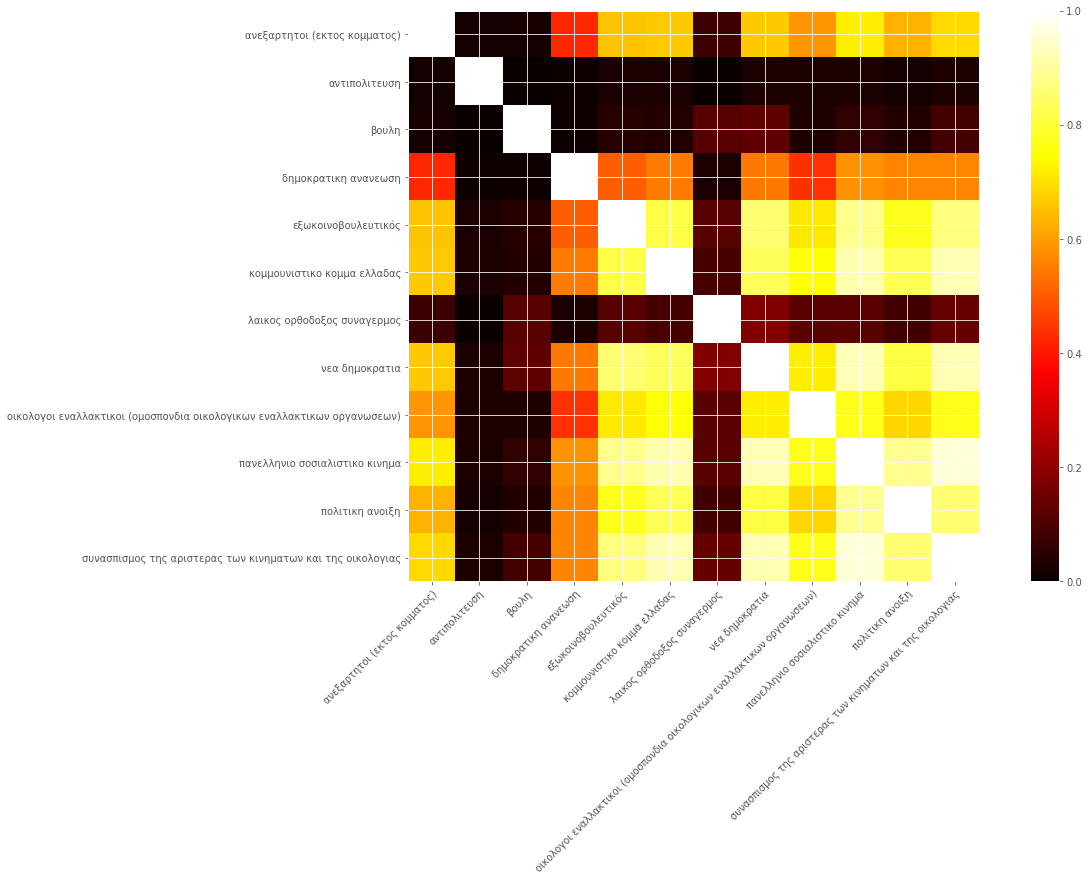

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plt.style.use('ggplot')
plt.imshow(similarities, cmap=cmap.hot)
plt.colorbar()

# We want to show all ticks...
ax.set_xticks(np.arange(len(similarities)))
ax.set_yticks(np.arange(len(similarities)))
# ... and label them with the respective list entries
ax.set_xticklabels(grouped_data_stemmed.political_party)
ax.set_yticklabels(grouped_data_stemmed.political_party)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.savefig('../out_files/fig6.png', bbox_inches='tight')
plt.show()

# (dina) It seems the colors changed a little bit towards lower similarities with stemming

After stemming the differences are greater.

#### Lemmatization

Lemmatization doesn't work properly with uppercase words without accents. For this reason we change the preprocess.

In [40]:
grouped_data_lemmatized = grouped_data_stopwords_removed.copy() #(dina) copy grouped_data_stopwords_removed instead of data_preprocess
#because we need the accents
grouped_data_lemmatized['speech'].at[1]

'ΑΚΟΥΜΕ ΚΑΤΑ ΠΛΕΙΟΨΗΦΙΑ ΚΑΤΑ ΠΛΕΙΟΨΗΦΙΑ ΚΑΤΑ ΠΛΕΙΟΨΗΦΙΑ ΚΑΤΑ ΠΛΕΙΟΨΗΦΙΑ ΘΕΛΟΥΜΕ ΑΝΤΙΓΡΑΦΟ ΚΥΡΙΟΙ ΣΥΝΑΔΕΛΦΟΙ ΥΠΑΡΧΕΙ ΑΛΛΟΣ ΕΓΓΕΓΡΑΜΜΕΝΟΣ ΜΙΛΗΣΕΙ ΕΠΙ ΑΡΘΡΟΥ ΚΥΡΙΟΣ ΥΠΟΥΡΓΟΣ ΕΧΕΙ ΛΟΓΟΕΙΝΑΙ ΤΡΟΠΟΛΟΓΙΑ ΥΠΟΥΡΓΕΙΟΥ ΤΟΥΡΙΣΜΟΥ ΑΦΟΡΑ ΑΡΣΗ ΠΡΟΣΤΑΣΙΑΣ ΕΠΑΓΓΕΛΜΑΤΙΚΗΣ ΣΤΕΓΗΣ ΜΙΣΘΩΣΕΙΣ ΑΚΙΝΗΤΩΝ ΕΟΤ ΛΟΓΟΣ ΕΙΝΑΙ ΣΑΦΗΣ ΥΠΑΡΧΕΙ ΠΡΟΘΕΣΗ ΒΕΛΤΙΩΣΕΩΣ ΚΑΤΑ ΚΑΠΟΙΟ ΤΡΟΠΟ ΚΑΛΥΤΕΡΑΣ ΑΞΙΟΠΟΙΗΣΕΩΣ ΑΥΤΩΝ ΑΚΙΝΗΤΩΝ ΟΠΟΙΑ ΔΥΣΤΥΧΩΣ ΒΡΙΣΚΟΝΤΑΙ ΠΟΛΥ ΚΑΚΗ ΚΑΤΑΣΤΑΣΗ ΕΠΕΙΔΗ ΥΠΑΡΧΟΥΝ ΠΟΛΛΟΙ ΟΠΟΙΟΙ ΝΕΜΟΝΤΑΙ ΑΥΤΗ ΣΤΙΓΜΗ ΧΩΡΙΣ ΑΞΙΟΠΟΙΟΥΝ ΕΠΑΡΚΩΣ ΔΥΝΑΤΟΤΗΤΕΣ ΕΧΟΥΝ ΘΕΛΕΙ ΕΟΤ ΕΧΕΙ ΔΥΝΑΤΟΤΗΤΑ ΔΙΑΚΟΠΟΥΝ ΑΥΤΕΣ ΣΥΜΒΑΣΕΙΣ ΩΣΤΕ ΜΠΟΡΕΣΟΥΝ ΑΞΙΟΠΟΙΗΘΟΥΝ ΚΑΛΥΤΕΡΑ ΑΥΤΑ ΑΚΙΝΗΤΑ ΠΛΑΙΣΙΟ ΓΕΝΙΚΗΣ ΠΟΛΙΤΙΚΗΣ ΕΧΕΙ ΑΝΑΒΑΘΜΙΣΕΩΣ ΞΕΝΟΔΟΧΕΙΩΝ ΑΛΛΩΝ ΤΟΥΡΙΣΤΙΚΩΝ ΕΓΚΑΤΑΣΤΑΣΕΩΝ ΑΝΗΚΟΥΝ ΔΙΑΝΕΜΗΘΕΙ ΑΥΤΗ ΤΡΟΠΟΛΟΓΙΑ ΕΙΝΑΙ ΓΕΝΙΚΟ ΑΡΙΘΜΟ ΕΙΔΙΚΟ ΑΙΣΧΟΣ ΑΙΣΧΟΣ'

In [41]:
from cltk.corpus.utils.importer import CorpusImporter

corpus_importer = CorpusImporter('greek')
corpus_importer.list_corpora
corpus_importer.import_corpus('greek_models_cltk')

In [42]:
from cltk.stem.lemma import LemmaReplacer
from cltk.corpus.utils.formatter import cltk_normalize

lemmatizer = LemmaReplacer('greek')
def lemmatizing_tokenizer(str_input):
    speeches = cltk_normalize(str_input)
    lemmas = lemmatizer.lemmatize(speeches)
    print(lemmas[:10])
    return lemmas

In [43]:
# Δεν λειτουργεί και τρομερά αλλά δεν πειράζει
print(lemmatizer.lemmatize('Κύριε Πρόεδρε, κυρίες και κύριοι συνάδελφοι αναλαμβάνετε'))

['κύριος', 'πρόεδρος', ',', 'κυρίες', 'και', 'κύριος', 'συνάδελφοι', 'αναλαμβάνετε']


In [44]:
%%time
#here there is no warning about the tokenizer and the stop words
vec = TfidfVectorizer(min_df=0.1, max_df=0.9, tokenizer=lemmatizing_tokenizer) #(dina) removed parameter stop_words=set(stopwords)
X = vec.fit_transform(grouped_data_lemmatized['speech'])
similarities = cosine_similarity(X)

['κυριε', 'προεδρε', 'κυριες', 'κυριοι', 'συναδελφοι', 'θεωρω', 'ιδιαιτερη', 'τιμη', 'ευκαιρια', 'δοθηκε']
['ακουμε', 'κατα', 'πλειοψηφια', 'κατα', 'πλειοψηφια', 'κατα', 'πλειοψηφια', 'κατα', 'πλειοψηφια', 'θελουμε']
['μαλιστα', 'μαλιστα', 'μαλιστα', 'μαλιστα', 'μαλιστα', 'μαλιστα', 'μαλιστα', 'μαλιστα', 'μαλιστα', 'μαλιστα']
['αυτο', 'οποιο', 'ειναι', 'σημαντικο', 'αξιοτιμες', 'κυριες', 'αξιοτιμοι', 'κυριοι', 'συναδελφοι', 'σ']
['κυριες', 'κυριοι', 'βουλευτες', 'συζητηση', 'προγραμματικες', 'δηλωσεις', 'βουλη', 'αλλα', 'χωρους', 'ζωης']
['κυριε', 'προεδρε', 'κυριοι', 'βουλευτες', 'παρον', 'νομοσχεδιο', 'αναφερεται', 'οδικες', 'μεταφορες', 'βασικα']
['βουλη', 'εγκρινει', 'κυριοι', 'συναδελφοι', 'εισερχομαστε', 'ημερησια', 'διαταξητης', 'νομοθετικης', 'εργασιας', 'συζητηθει']
['κυριες', 'κυριοι', 'συναδελφοι', 'αναλαμβανοντας', 'προεδρια', 'σωματος', 'ηθελα', 'αρχην', 'ευχαριστησω', 'οσους']
['ευχαριστω', 'εστω', 'τοσο', 'αργα', 'ηρθε', 'σειρα', 'αντιπροσωποι', 'ελληνιδων', 'ελληνων', '

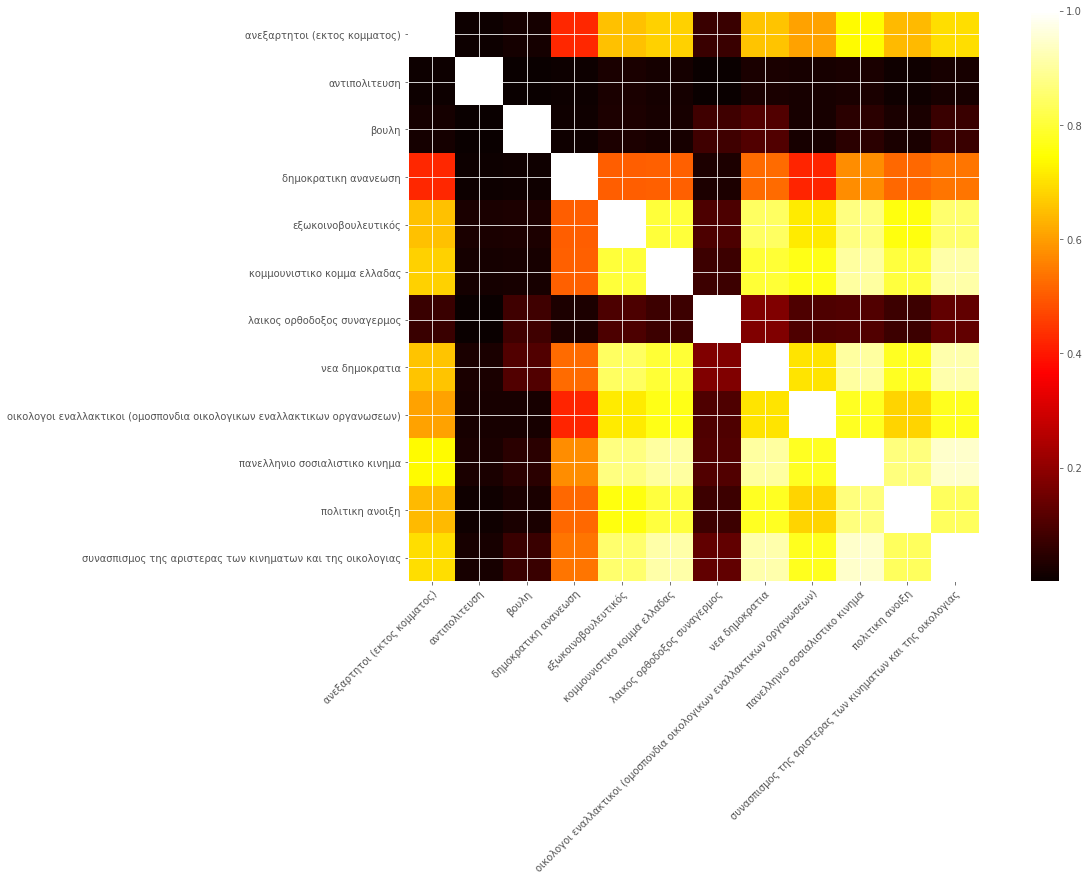

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plt.style.use('ggplot')
plt.imshow(similarities, cmap=cmap.hot)
plt.colorbar()

# We want to show all ticks...
ax.set_xticks(np.arange(len(similarities)))
ax.set_yticks(np.arange(len(similarities)))
# ... and label them with the respective list entries
ax.set_xticklabels(grouped_data_lemmatized.political_party)
ax.set_yticklabels(grouped_data_lemmatized.political_party)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.savefig('../out_files/fig7.png', bbox_inches='tight')
plt.show()

The differences amplify. This result is very similar to the result involving only digit removal.